In [ ]:
a = []
while(1):
    a.append('1')

In [1]:
# Ejecuta esta celda para activar tu cuenta de Google Drive.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#root_dir = "/content/drive/My Drive/"
#base_dir = root_dir + 'Playing_with_variables/'
#!ls "/content/drive/My Drive/DBSCAN_cone"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [3]:
## Localiza el satelite de manera visual
Xp = pd.read_csv('/content/drive/My Drive/DBSCAN_cone/snapshotgra_0031.ascii',sep='\s+')
Xp = Xp.drop(['m','eps'], axis = 1)

Xp = np.array(Xp)
print(np.shape(Xp))

(1171700, 6)


In [ ]:
"""plt.xlabel ('x (kpc)')
plt.ylabel ('z (kpc)')

plt.plot(Xp[0:11700,0]-cx,Xp[0:11700,2]-cz,'r.',markersize=1)
plt.show()"""

In [ ]:
"""plt.xlabel ('x (kpc)')
plt.ylabel ('z (kpc)')

plt.xlim(-200,200)
plt.ylim(-200,200)

#plt.axvline(-1,c="b")
#plt.axhline(50,c="b")
horiz_line = 50
vert_line = -1

plt.hlines(y=horiz_line, xmin=-200, xmax=-1, color='blue', zorder=1)
plt.vlines(x=vert_line, ymin=-200, ymax=50, color='blue', zorder=2)

plt.plot(Xp[0:11700,0]-cx,Xp[0:11700,2]-cz,'r.',markersize=0.5)
plt.savefig('sate_real.png',dpi=300)
plt.show()"""

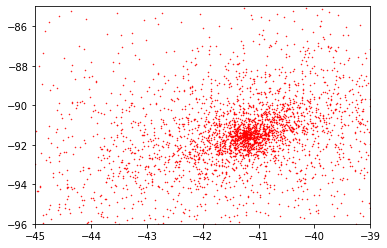

In [ ]:
plt.xlim(-45,-39)
plt.ylim(-96,-85)
plt.plot(Xp[0:11700,0],Xp[0:11700,2],'r.',markersize=1)
plt.show()

In [13]:
f = 1000/0.7 # Mpc/h to kpc
  
#Calculadas con Rockstar para snap31
cx = 0.001021
cy = 0.000081
cz = 0.002220

cx = cx*f
cy = cy*f
cz = cz*f

print(cx,cy,cz)

1.4585714285714286 0.11571428571428573 3.1714285714285717


In [14]:
#for the sattelite

#centro de masa del satelite en este snap
  
cxs =  -0.028836*f
cys = 0.000277*f
czs =  -0.064063*f

print(cxs,cys,czs)

-41.19428571428572 0.39571428571428574 -91.51857142857143


In [15]:
t0 = time.time()
XN = pd.read_csv('/content/drive/My Drive/DBSCAN_cone/snapshotgra_0031.ascii',sep='\s+')
XN = XN.drop(['eps'], axis = 1)

XN['x'] = XN['x']-cx
XN['y'] = XN['y']-cy
XN['z'] = XN['z']-cz

In [16]:
rs= 150.
g = 2

NewX=XN['x']-cxs
NewY=XN['y']-cys

#if( (XN['z'] < 0) and (np.absolute(XN['z']) < np.absolute(g*czs))):
#XN = XN[ ((((XN['x']-cxs)/a1)**2.0 + ((XN['y']-cys)/b1)**2.0) < ((XN['z']/(2*czs))**2.0))]
XN = XN[ (XN['z'] < 0) & (np.absolute(XN['z']) < np.absolute(g*czs)) &((NewX)**2.0 + (NewY)**2.0 < (rs**2.0)*(XN['z']/(g*czs))**2.0)   ]
XN=np.array(XN)

In [ ]:
print(np.shape(XN))

(77999, 7)


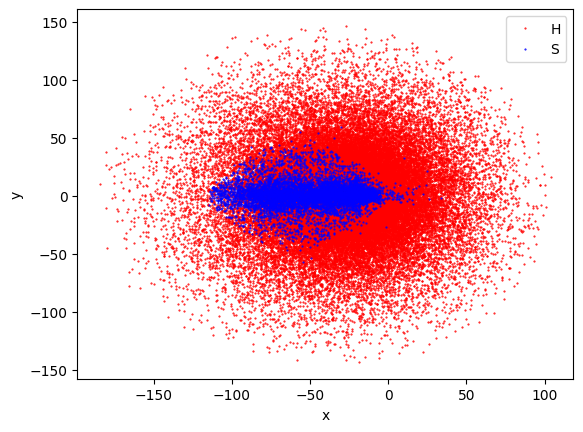

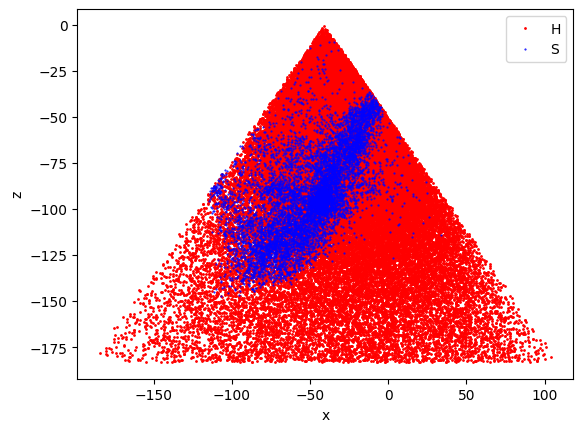

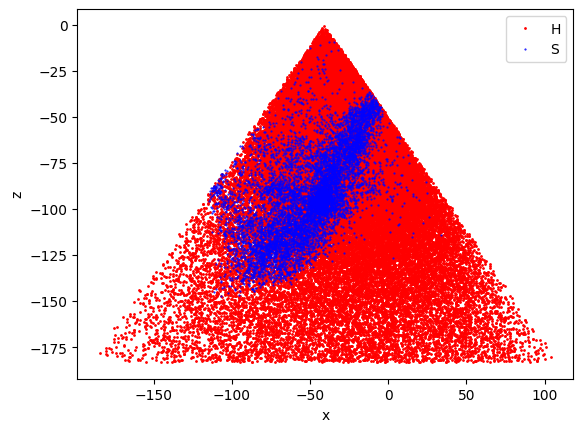

In [17]:
# -41.19428571428572 0.39571428571428574 -91.51857142857143
#plt.xlim(-50,50)
#plt.ylim(-100,100)
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
#plt.plot(XN[:,1], XN[:,2],'r.')
plt.plot(XN[:,1][(XN[:,0] < 4.78 )], XN[:,2][(XN[:,0] < 4.78 )],'r.',markersize=1,label='H')
plt.plot(XN[:,1][(XN[:,0] == 4.78 )], XN[:,2][(XN[:,0] == 4.78 )],'b.',markersize=1,label='S')
#plt.savefig('/content/drive/My Drive/DBSCAN_cone/plot1_h+s_xy.png',dpi=300)
plt.legend()
plt.show()

plt.figure()
plt.xlabel('x')
plt.ylabel('z')
#plt.plot(XN[:,1], XN[:,2],'r.')
plt.plot(XN[:,1][(XN[:,0] < 4.78 )], XN[:,3][(XN[:,0] < 4.78 )],'r.',markersize=2,label='H')
plt.plot(XN[:,1][(XN[:,0] == 4.78 )], XN[:,3][(XN[:,0] == 4.78 )],'b.',markersize=1,label='S')
plt.legend()
#plt.savefig('/content/drive/My Drive/DBSCAN_cone/plot1_h+s_xz.png',dpi=300)
plt.show()

plt.figure()
plt.xlabel('x')
plt.ylabel('z')
#plt.plot(XN[:,1], XN[:,2],'r.')
plt.plot(XN[:,1][(XN[:,0] < 4.78 )], XN[:,3][(XN[:,0] < 4.78 )],'r.',markersize=2,label='H')
plt.plot(XN[:,1][(XN[:,0] == 4.78 )], XN[:,3][(XN[:,0] == 4.78 )],'b.',markersize=1,label='S')
plt.legend()
plt.savefig('/content/drive/My Drive/DBSCAN_cone/plot1_h+s_xz.png',dpi=300)
plt.show()


In [18]:
count= 0
count2=0
for i in range(np.shape(XN)[0]):
 if( XN[i,0] == 4.78 ):
  count = count + 1
 if( XN[i,0] < 4.78 ):
  count2 = count2 + 1 

print(count,count2,count+count2)

10749 67250 77999


In [19]:
t0 = time.time()
XN = pd.read_csv('/content/drive/My Drive/DBSCAN_cone/snapshotgra_0031.ascii',sep='\s+')
XN = XN.drop(['eps'], axis = 1)

XN['x'] = XN['x']-cx
XN['y'] = XN['y']-cy
XN['z'] = XN['z']-cz

rs= 150.
g = 2

NewX=XN['x']-cxs
NewY=XN['y']-cys

XN = XN[ (XN['z'] < 0) & (np.absolute(XN['z']) < np.absolute(g*czs)) &((NewX)**2.0 + (NewY)**2.0 < (rs**2.0)*(XN['z']/(g*czs))**2.0)   ]
#XN=np.array(XN)

#Tercer rango de pruebas
#XN = XN[ ((XN['x']) >= -130) & ((XN['x']) <= 25) & ((XN['y']) >= -15)& ((XN['y']) <= 15) & ((XN['z']) >=-180) & ((XN['z']) <= 0)]

# Definiendo una nueva columna utilizando la masa para saber si las particulas son del satelite o del halo
def sat(row): 
    if row["m"] == 4.78:
        sat = 1
    else:
        sat = 0
    return pd.Series(dict(sat=sat))

#anade la nueva columna
XN = XN.join(XN.apply(sat,axis="columns"))
XN = np.array(XN)
#indices de las particulas del satelite del archivo con cortes

# Las que no son del satelite
ind = np.where(XN[:,7] == 1)[0]
ind2 = np.where(XN[:,7] == 0)[0]
#print(np.shape(XN))

#print(XN)
#print(np.shape(XN))
print(time.time()-t0)

#print(ind2)

22.152915716171265


In [ ]:
print(np.shape(XN))
print(np.shape(XN[ind]))
print(np.shape(XN[ind2]))

(77999, 8)
(10749, 8)
(67250, 8)


In [20]:
# estimando particulas a radius para estimar Np

Xc = pd.read_csv('/content/drive/My Drive/DBSCAN_cone/snapshotgra_0031.ascii',sep='\s+')
Xc = Xc.drop(['eps'], axis = 1)

Xc['x'] = Xc['x']-cx
Xc['y'] = Xc['y']-cy
Xc['z'] = Xc['z']-cz

rc = ((Xc['x'])*(Xc['x']) + (Xc['y'])*(Xc['y'])+(Xc['z'])*(Xc['z']) )**0.5
#Tercer rango de pruebas
Xc = Xc[(rc < 3) & (Xc['m']!= 4.78 )]
print(np.shape(Xc))

(8524, 7)


In [21]:
## utilizar knn para tratar de estimar la densidad alrededor de cada particula
from sklearn.neighbors import NearestNeighbors
import time

t0 = time.time()
#Np = np.shape(XN)[0]

#original
#nbrs = NearestNeighbors(n_neighbors=int((np.shape(Xc)[0])/2), algorithm='auto',n_jobs=-1).fit(XN[:,1:4])

# ahora usa todo
#nbrs = NearestNeighbors(n_neighbors=int((np.shape(Xc)[0])/2), algorithm='auto',n_jobs=-1).fit(XN[:,1:4])
nbrs = NearestNeighbors(n_neighbors=300, algorithm='auto',n_jobs=-1).fit(XN[:,1:4])

distances, indices = nbrs.kneighbors(XN[:,1:4])
print(time.time()-t0)

4.026046276092529


In [22]:
#Vamos a cambiar de r=3 a r=1
radius=1

Np = np.shape(XN)[0]
lend=[]
for i in range(Np):
    lend.append(len(np.where(distances[i] <= radius)[0]))    
#print(time.time()-t0)
#print(np.shape(lend))
#print(lend[1])

In [23]:
tmp = []
for i in range(Np):
    #lend=len(np.where(distances[i] <= 3.)[0])
    tmp.append((lend[i])/((4./3.)*(np.pi)*(radius**3)) )
    #print(lend[i])
    #print(len(np.where(distances[i] <= 3.)[0]))
#print(time.time()-t0)

In [24]:
rho_2=np.array(tmp)

#ind = XN[:,7]
#masses = XN[:,0]

vx = (XN[:,4])
vy = (XN[:,5])
vz = (XN[:,6])

#ff3 = np.absolute((min(vz) - max(vz))/( max(rho_2) - min(rho_2)))

New_Xt = np.vstack((vx,vy,vz,rho_2))

New_Xt=New_Xt.T

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

New_Xt = sc.fit_transform(New_Xt)

In [ ]:
"""for j in range(1,41):
    m=j*10
    l=m+2
    
    nbrs = NearestNeighbors(n_neighbors=l, algorithm='auto').fit(New_Xt)
    distances, indices = nbrs.kneighbors(New_Xt)
    dist = [distances[i,m] for i in range(distances.shape[0])]

    plt.figure()
    plt.xlabel('bin (eps)')
    plt.ylabel('Neighbours in distances bin')
    #plt.axvline(0.22,c="r")
    plt.hist(np.array(dist),bins=np.arange(0,1,0.005),histtype='step',label='Total sample')
    plt.hist(np.array(dist)[ind2],bins=np.arange(0,1,0.005),histtype='step',label='Only halo in total sample')
    plt.hist(np.array(dist)[ind],bins=np.arange(0,1,0.005),histtype='step',label='Only sat in total sample')
    plt.legend()
    #plt.savefig('histof4_pruebas.png',dpi=300)
    plt.show()
    print(l,m)"""

'for j in range(1,41):\n    m=j*10\n    l=m+2\n    \n    nbrs = NearestNeighbors(n_neighbors=l, algorithm=\'auto\').fit(New_Xt)\n    distances, indices = nbrs.kneighbors(New_Xt)\n    dist = [distances[i,m] for i in range(distances.shape[0])]\n\n    plt.figure()\n    plt.xlabel(\'bin (eps)\')\n    plt.ylabel(\'Neighbours in distances bin\')\n    #plt.axvline(0.22,c="r")\n    plt.hist(np.array(dist),bins=np.arange(0,1,0.005),histtype=\'step\',label=\'Total sample\')\n    plt.hist(np.array(dist)[ind2],bins=np.arange(0,1,0.005),histtype=\'step\',label=\'Only halo in total sample\')\n    plt.hist(np.array(dist)[ind],bins=np.arange(0,1,0.005),histtype=\'step\',label=\'Only sat in total sample\')\n    plt.legend()\n    #plt.savefig(\'histof4_pruebas.png\',dpi=300)\n    plt.show()\n    print(l,m)'

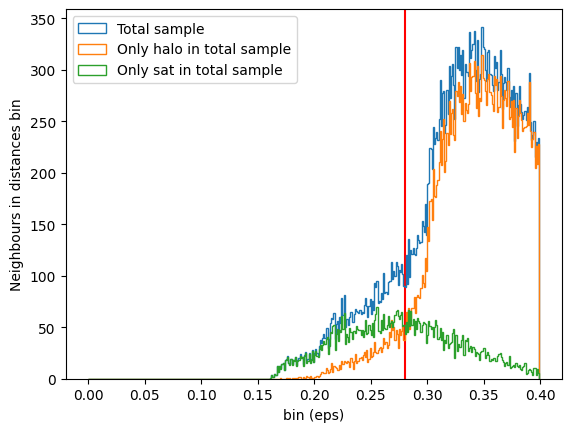

In [25]:
nbrs = NearestNeighbors(n_neighbors=392, algorithm='auto').fit(New_Xt)
distances, indices = nbrs.kneighbors(New_Xt)
dist = [distances[i,390] for i in range(distances.shape[0])]

plt.figure()
plt.xlabel('bin (eps)')
plt.ylabel('Neighbours in distances bin')
plt.axvline(0.28,c="r")
plt.hist(np.array(dist),bins=np.arange(0,0.4,0.001),histtype='step',label='Total sample')
plt.hist(np.array(dist)[ind2],bins=np.arange(0,0.4,0.001),histtype='step',label='Only halo in total sample')
plt.hist(np.array(dist)[ind],bins=np.arange(0,0.4,0.001),histtype='step',label='Only sat in total sample')
plt.legend()
#plt.savefig('/content/drive/My Drive/DBSCAN_cone',dpi=300)
plt.show()
#print(l,m)

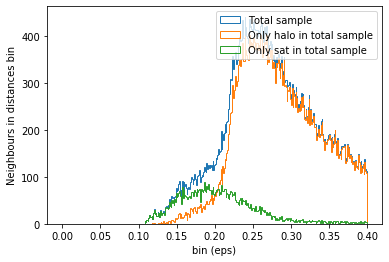

152 150


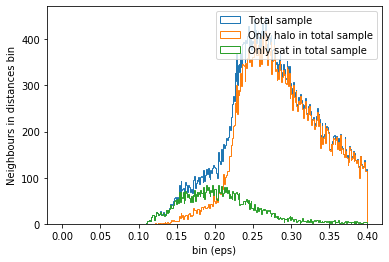

162 160


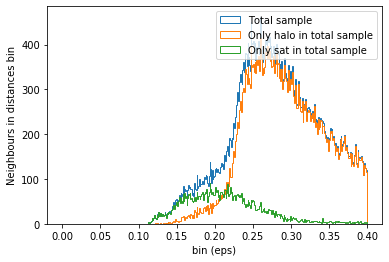

172 170


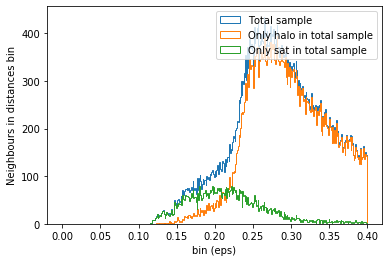

182 180


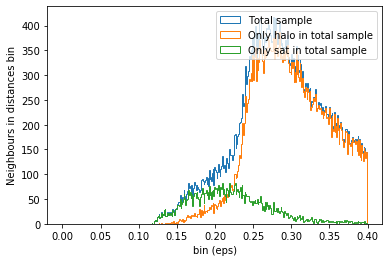

192 190


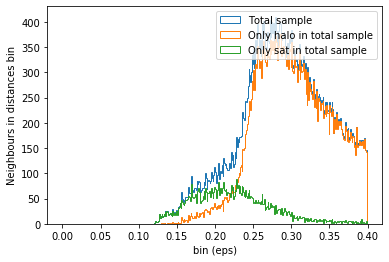

202 200


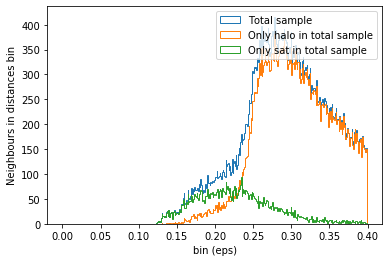

212 210


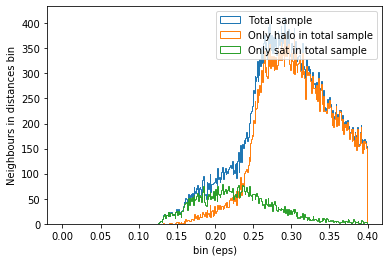

222 220


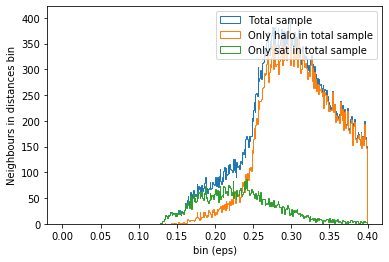

232 230


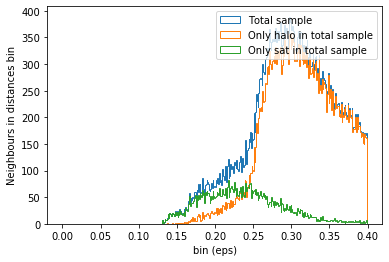

242 240


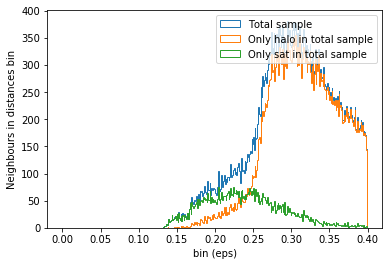

252 250


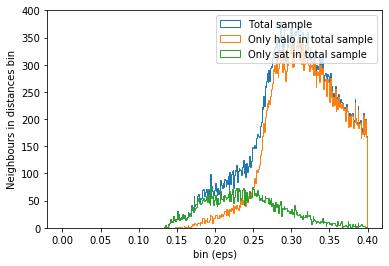

262 260


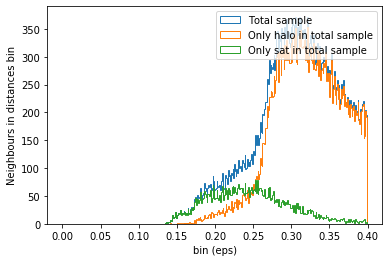

272 270


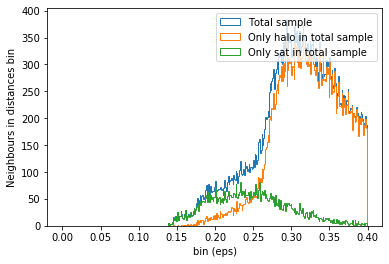

282 280


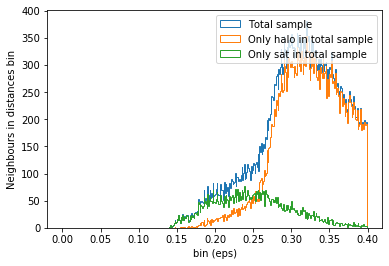

292 290


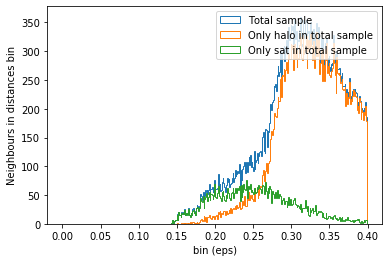

302 300


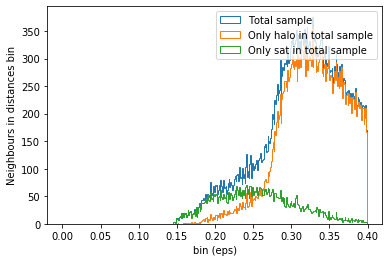

312 310


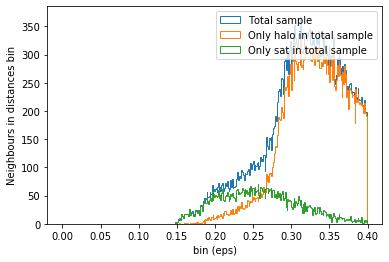

322 320


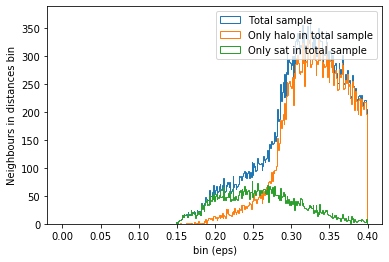

332 330


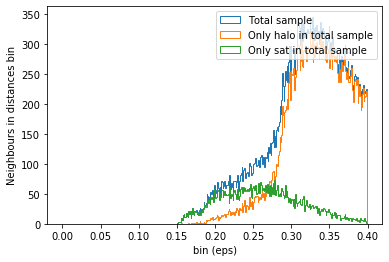

342 340


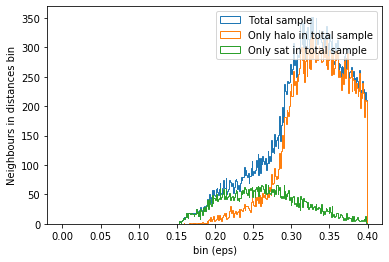

352 350


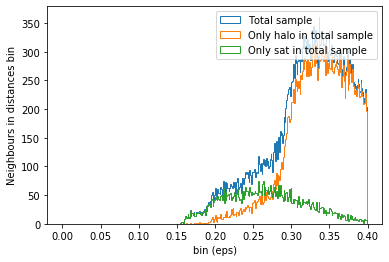

362 360


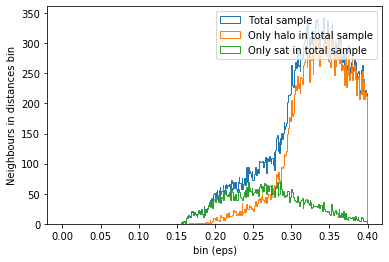

372 370


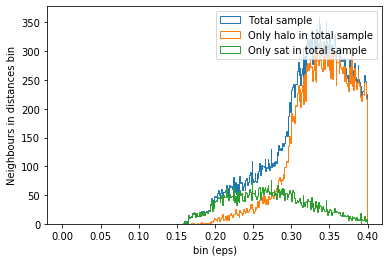

382 380


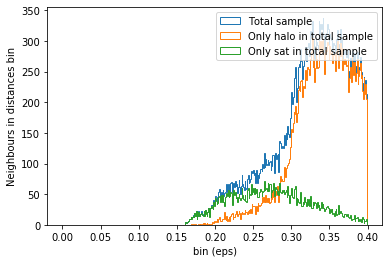

392 390


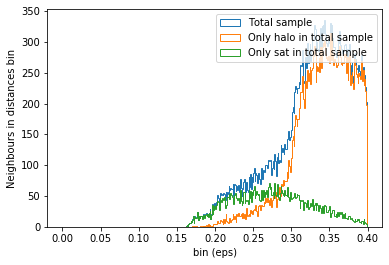

402 400


In [ ]:


for j in range(15,41):
    m=j*10
    l=m+2
    
    nbrs = NearestNeighbors(n_neighbors=l, algorithm='auto').fit(New_Xt)
    distances, indices = nbrs.kneighbors(New_Xt)
    dist = [distances[i,m] for i in range(distances.shape[0])]

    plt.figure()
    plt.xlabel('bin (eps)')
    plt.ylabel('Neighbours in distances bin')
    #plt.axvline(0.22,c="r")
    plt.hist(np.array(dist),bins=np.arange(0,0.4,0.001),histtype='step',label='Total sample')
    plt.hist(np.array(dist)[ind2],bins=np.arange(0,0.4,0.001),histtype='step',label='Only halo in total sample')
    plt.hist(np.array(dist)[ind],bins=np.arange(0,0.4,0.001),histtype='step',label='Only sat in total sample')
    plt.legend()
    #plt.savefig('histof4_pruebas.png',dpi=300)
    plt.show()
    print(l,m)

In [ ]:
"""# Aplicar features scaling to other velocity matrix
mean = np.array(sc.mean_)
var = np.array(sc.var_)

meaning = []
varis = []

for i in range(0,3):
    meaning.append(mean[i])
    varis.append(np.sqrt(var[i]))
print(meaning)

def scale_data(array,means=meaning,stds=(varis)):
    return (array-means)/stds

## Nuevos datos

Xv = pd.read_csv('../snapshotgra_0031.ascii',sep='\s+')
Xv = Xv.drop(['m','x','y','z','eps'], axis = 1)

Xv = np.array(Xv)
print(np.shape(Xv))
#Xv = Xv[11700:1011700,:]
"""
"""
print(np.shape(Xv))
print(Xv)

New_Xv = scale_data(Xv)"""

In [ ]:
#!pip install tensorflow

In [31]:
from tensorflow.keras import backend
from tensorflow.keras import backend
from sklearn.cluster import DBSCAN
from sklearn import metrics
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [32]:
import seaborn as sns
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
"""#V=((XN[11700:1171700,4])**2.+(XN[11700:1171700,5])**2.0+(XN[11700:1171700,6])**2.0)**0.5

V=np.array(V)

rad_range = [0, 200]
n_bins = 50
hist, bins = np.histogram(V, bins=n_bins, range=rad_range,)
inds = np.digitize(V, bins=bins)

#print(inds)
radtp = (bins[:-1] + bins[1:])/2 
DBsize= 16

rmin3= (bins[:-1])**3
rmax3= (bins[1:])**3

rest=(bins[1:])**3 - (bins[:-1])**3

N_shell= (DBsize**3)*(hist)/((rest)) 
poisson =    np.sqrt(N_shell)    
plt.plot(radtp, poisson, 'r.') 
plt.xlabel('vel  [km/s]')
plt.ylabel('poisson ')
plt.savefig("filter_poisson.png")
print(hist)
"""

In [ ]:
"""radtp=  np.vstack(radtp)
poisson = np.vstack(poisson)

dataset = pd.DataFrame({'radtp': radtp[:, 0], 'poisson': poisson[:, 0]})

G = [dataset['radtp'], dataset['poisson']]
G=np.array(G)
G=G.T

print(G[:,0],G[:,1])"""

In [40]:
#db = DBSCAN(eps=0.47, min_samples=40).fit(New_X)
#New_Xt2 = New_Xt[ind2]
db = DBSCAN(eps=0.3, min_samples=390).fit(New_Xt)
core_samples = np.zeros_like(db.labels_, dtype=bool)
core_samples[db.core_sample_indices_] = True
labels = db.labels_

unique_labels = np.unique(labels)
print(unique_labels)

[-1  0]


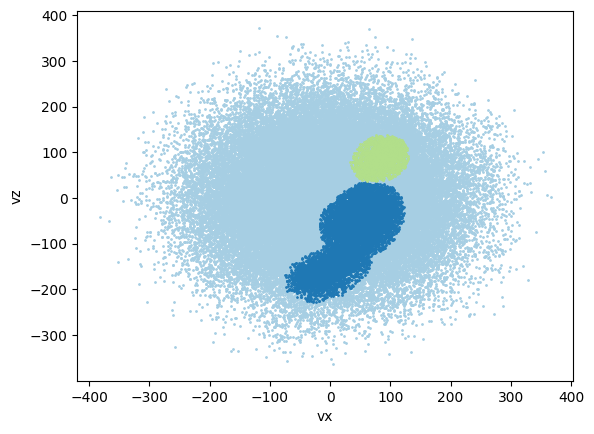

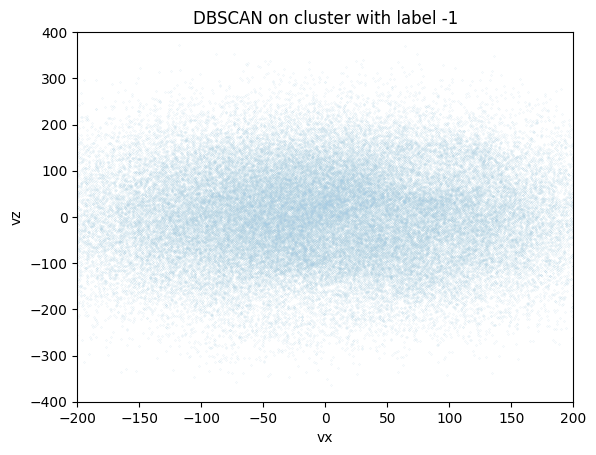

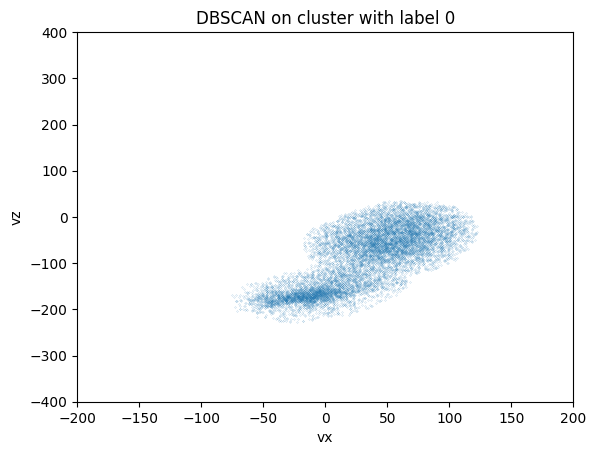

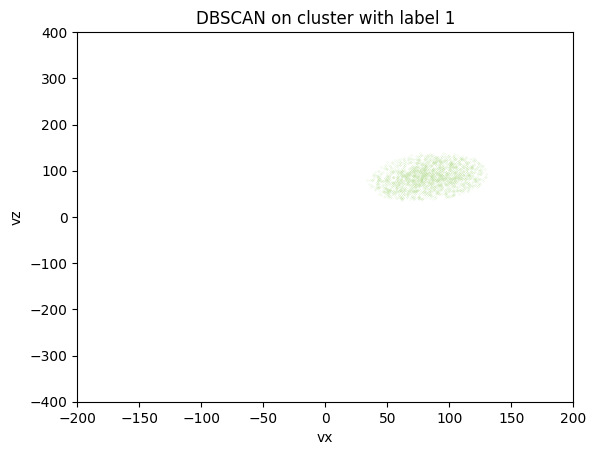

In [33]:
full_fig, full_ax = plt.subplots()

#colors=plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
colors= sns.color_palette("Paired",380)

for (label, color) in zip(unique_labels, colors):
   
    class_member_mask = (labels == label)
        
    xy = XN[class_member_mask & core_samples]
    xy2 = XN[class_member_mask & ~core_samples]
    
    part_fig, part_ax = plt.subplots(subplot_kw=dict(xlim=(-200, 200), ylim=(-400 ,400)))
    
    indc = np.where(xy[:,7] == 0)[0]
    indf = np.where(xy2[:,7] == 0)[0]
    
    #print(inds)
    
    xx = xy[:,4]
    yy = xy[:,6]
    
    xx2 = xy2[:,4]
    yy2 = xy2[:,6]  
    
    #xxs = xy[~indc,4]
    #yys = xy[~indc,6]
    
    #xx2s = xy2[~indf,4]
    #yy2s = xy2[~indf,6] 
    
    #print(np.shape(yy2))        
    #if(label > -2):
        
    plt.title("DBSCAN on cluster with label {}".format(label))
    
     #full_fig, full_ax = plt.subplots(subplot_kw=dict(xlim=(-50, 50),ylim=(20, 65)))
        
    plt.xlabel("vx")
    plt.ylabel("vz")

    full_ax.set_xlabel('vx')  
    full_ax.set_ylabel('vz') 
        
    full_ax.plot(xx, yy, 'o', c=color,markersize=1)
    full_ax.plot(xx2, yy2,'o', c=color,markersize=1)

    part_ax.plot(xx, yy, 'o', c=color,markersize=0.1)
    part_ax.plot(xx2, yy2, 'o', c=color,markersize=0.1)   
    
    #full_ax.plot(xxs, yys, '*', c=color,markersize=1)
    #full_ax.plot(xx2s, yy2s,'*', c=color, markersize=1)

    #part_ax.plot(xxs, yys, '*', c='red',markersize=0.1)
    #part_ax.plot(xx2s, yy2s, '*', c='red',markersize=0.1)   
    
    ####full_fig.savefig("/content/drive/My Drive/DBSCAN_cone/DBSCAN_vel_0.02_con_vx_400.png",dpi=300)
    #part_ax.set_title("Part %d" % i)
    ####part_fig.savefig("/content/drive/My Drive/DBSCAN_cone/part_%d_con_vx_0.02_400.png" % label)
    #plt.show() 


In [ ]:
#indc = np.where( New_X[0 & core_samples] )[0]


0  particulas del halo en los puntos core con etiqueta -1 de un total de (0,)
56517 particulas del halo en los puntos frontera con etiqueta -1 de un total de (59458,)
3338  particulas del halo en los puntos core con etiqueta 0 de un total de (8683,)
7395 particulas del halo en los puntos frontera con etiqueta 0 de un total de (9858,)


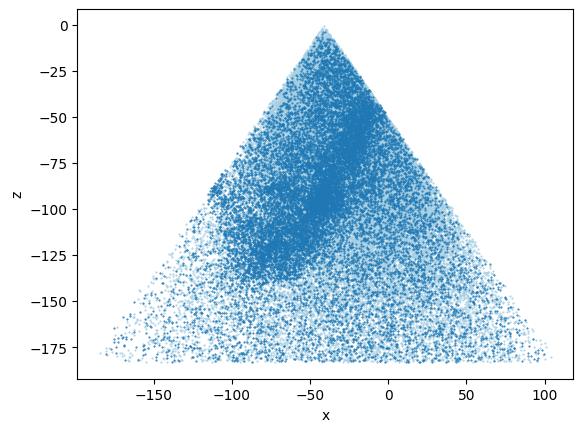

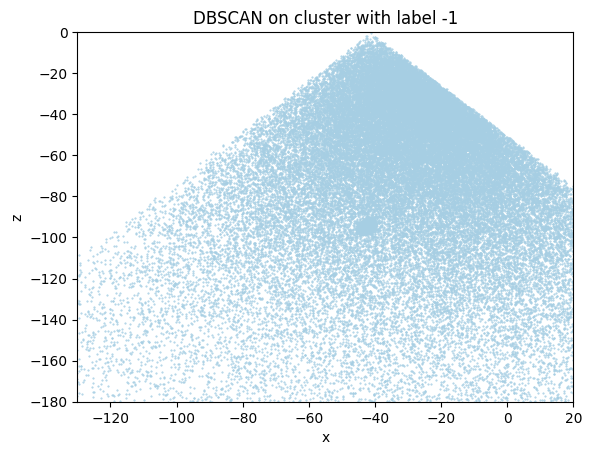

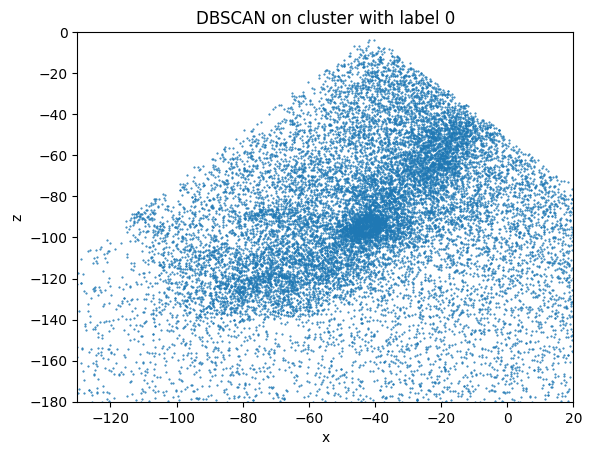

In [41]:
full_fig, full_ax = plt.subplots()

#colors=plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
colors= sns.color_palette("Paired",310)

for (label, color) in zip(unique_labels, colors):
   
    class_member_mask = (labels == label)
    
    xy = XN[class_member_mask & core_samples]
    xy2 = XN[class_member_mask & ~core_samples]

    part_fig, part_ax = plt.subplots(subplot_kw=dict(xlim=(-130, 20), ylim=(-180 ,0)))
    
    
    count=0
    for k in range(0,np.shape(xy[:,1])[0]):  
        if( (xy[k,7] == 0) ):            
            count=count+1
    print(count, ' particulas del halo en los puntos core con etiqueta',label, 'de un total de',np.shape(xy[:,1])) 
         
    count=0 
    for k in range(0,np.shape(xy2[:,1])[0]):     
        if( (xy2[k,7] == 0) ):           
            count=count+1
    print(count, 'particulas del halo en los puntos frontera con etiqueta',label,'de un total de',np.shape(xy2[:,1]))  
    
    
    indc = np.where(xy[:,7] == 0)[0]
    indf = np.where(xy2[:,7] == 0)[0]
    
    xx = xy[:,1]
    yy = xy[:,3]
    #xic = xy[indc,7]
     
    xx2 = xy2[:,1]
    yy2 = xy2[:,3]
    #xib = xy2[indf,7]
    
    #xxs = xy[~indc,1]
    #yys = xy[~indc,3]
    #xics = xy[~indc,7]
    
    #xx2s = xy2[~indf,1]
    #yy2s = xy2[~indf,3] 
    #xibs = xy2[~indf,7]
    
    plt.title("DBSCAN on cluster with label {}".format(label))
    
     #full_fig, full_ax = plt.subplots(subplot_kw=dict(xlim=(-50, 50),ylim=(20, 65)))
        
    plt.xlabel("x")
    plt.ylabel("z")
        
    #plt.xlim()    
    #plt.ylim()
    
    full_ax.set_xlabel('x')  
    full_ax.set_ylabel('z') 
        
    full_ax.plot(xx, yy, 'o', c=color,markersize=0.5)
    full_ax.plot(xx2,yy2,'o', c=color,markersize=0.5)

    part_ax.plot(xx, yy, 'o', c=color,markersize=0.5)
    part_ax.plot(xx2, yy2, 'o', c=color,markersize=0.5)   
        
    #full_ax.plot(xxs, yys, '*', c='red',markersize=0.5)
    #ull_ax.plot(xx2s, yy2s,'*', c='red', markersize=0.5)

    #part_ax.plot(xxs, yys, '*', c='red',markersize=0.5)
    #part_ax.plot(xx2s, yy2s, '*', c='red',markersize=0.5)     
    
    ####full_fig.savefig("/content/drive/My Drive/DBSCAN_cone/DBSCAN_pos_con_vx_0.02_390.png",dpi=300)
    #part_ax.set_title("Part %d" % i)
    ####part_fig.savefig("/content/drive/My Drive/DBSCAN_cone/part_pos_%d_con_vx_0.02_390.png" % label)
     #plt.show()  